In [1]:
import gym
import numpy as np
import matplotlib.pyplot as plt
from gym.envs.registration import register
import random as pr

In [13]:
def rargmax(vector):
    m = np.amax(vector)
    indices = np.nonzero(vector == m)[0]
    return pr.choice(indices)

In [14]:
# register(
#     id='FrozenLake-v3',
#     entry_point='gym.envs.toy_text:FrozenLakeEnv',
#     kwargs={'map_name':'4x4', 'is_slippery':True}
# )
env = gym.make('FrozenLake-v0')


[2017-02-07 17:31:09,120] Making new env: FrozenLake-v0


In [40]:
# Initialize table with all zeros
Q = np.zeros([env.observation_space.n, env.action_space.n])
# Non-deterministic world 
learning_rate = .85
# Discount factor
dis = .99
# Set learning parameters
num_episodes = 2000

In [41]:
# create lists to contain total rewards and steps per episode
rList = []
for i in range(num_episodes):
    # Exploit Vs Exploration: decaying E-greedy
    e = 1. / ((i // 100) + 1)
    
    # Reset environment and get first new obervation
    state = env.reset()
    rAll = 0
    done = False
    
    # The Q-Table learning alogorithm
    while not done:
        
        # Exploit Vs Exploration: decaying E-greedy
        # if np.random.rand(1) < e:
        #     action = env.action_space.sample()
        # else:
        #    action = np.argmax(Q[state, :])
        
        # Exploit Vs Exploration : add random noise
        action = np.argmax(Q[state,:] + np.random.randn(1, env.action_space.n)/(i + 1))
        
        # Get new state and reward from environmemt
        new_state, reward, done, _ = env.step(action)
        

        # Updata Q-Table with new knowledge using learning rate
        # Q[state,action] = reward + dis * np.max(Q[new_state,:])
        
        # Update Q-Table with Non-deterministic world
        
        Q[state,action] = (1 - learning_rate) * Q[state,action] \
        + learning_rate * (reward + dis * np.max(Q[new_state,:]))
        
        rAll += reward
        state = new_state
        
    rList.append(rAll)


Success rate: 0.63
Final Q-Table Values
LEFT DOWN RIGHT UP
[[  8.68849693e-03   2.95533744e-01   1.79623987e-02   1.75949698e-02]
 [  2.40326164e-03   1.96639771e-03   1.57874086e-03   2.24104572e-01]
 [  3.15234476e-03   3.12187239e-03   1.12694044e-02   1.91136960e-01]
 [  3.92771075e-04   4.39910595e-04   2.33144536e-03   1.68027838e-01]
 [  3.56394423e-01   1.73457837e-04   3.04587753e-05   2.90128059e-03]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  1.42950606e-05   3.00439745e-04   3.66206336e-01   1.69014581e-04]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  5.63872303e-04   3.72392055e-03   3.74525790e-03   3.19377632e-01]
 [  1.65439995e-03   5.52872227e-01   8.59068873e-04   7.20376049e-04]
 [  7.20109606e-01   0.00000000e+00   2.81093989e-04   8.74946919e-04]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  2.42106849e-03

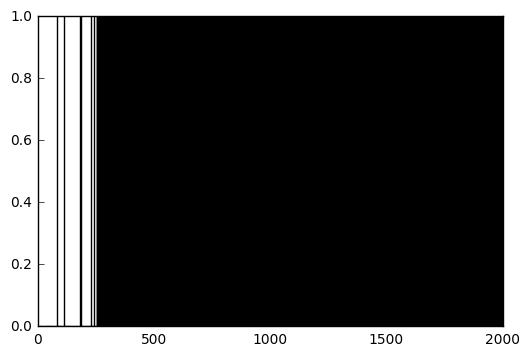

In [42]:
print("Success rate: " + str(sum(rList)/num_episodes))
print("Final Q-Table Values")
print("LEFT DOWN RIGHT UP")
print(Q)
plt.bar(range(len(rList)), rList, color="blue")
plt.show()